In [6]:
import numpy as np
import pandas as pd

from pybats.analysis import *
from pybats.point_forecast import *
from pybats.plot import *
from pybats.loss_functions import MAPE

import matplotlib.pyplot as plt
from numpy import genfromtxt

In [14]:
spend = pd.read_csv('data.csv')  
data.head()
data['Spending'] = spend
data.head()
data.dropna(inplace=True)
#pd.concat([data.head(3), data.tail(3)])
data.info

<bound method DataFrame.info of        Date  Inflation  Spending
0   1977-Q3   6.151037  2.604191
1   1977-Q4   6.569646  4.165503
2   1978-Q1   6.445443  0.542109
3   1978-Q2   6.890314  2.617697
4   1978-Q3   7.359638  5.539725
..      ...        ...       ...
94  2001-Q1   2.401512  6.221989
95  2001-Q2   2.544220  0.470012
96  2001-Q3   2.217744  4.588551
97  2001-Q4   1.977607  3.724393
98  2002-Q1   1.665869  2.633954

[99 rows x 3 columns]>

In [59]:
# Load spending data

forecast_start = '1977-Q3'
forecast_end = '2014-Q3'
X = data.Spending.values[:-1]

mod, samples = analysis(Y = data.Spending.values[1:], X=X, family="normal",
                        k = 1, prior_length = 12,
                        forecast_start = forecast_start, forecast_end = forecast_end,
                        dates=data.Date,
                        ntrend = 2, deltrend=.99,
                        seasPeriods=[4], seasHarmComponents=[[1,2]], delseas=.99,
                        nsamps = 5000)

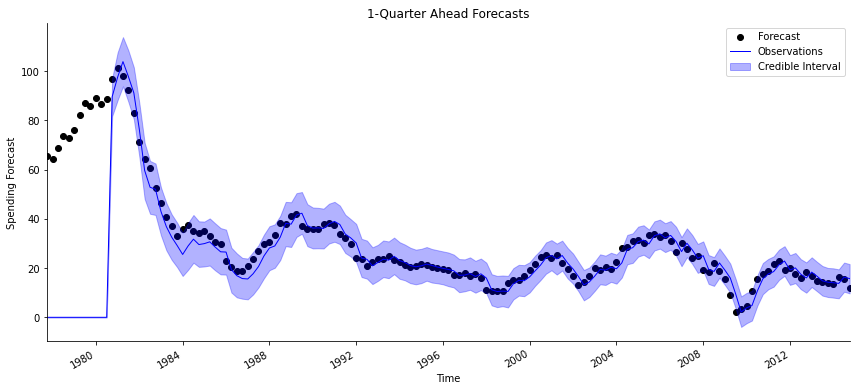

In [60]:
forecast = median(samples)

# Plot the 1-quarter ahead forecast
h = 1
start = data[data.Date == forecast_start].index[0] + h
end = data[data.Date == forecast_end].index[0] + h + 1

fig, ax = plt.subplots(figsize=(12, 6))
plot_data_forecast(fig, ax, y = data[start:end].Spending.values,
                   f = forecast[:,h-1],
                   samples = samples[:,:,h-1],
                   dates = pd.to_datetime(data[start:end].Date.values),
                   xlabel='Time', ylabel='Spending Forecast', title='1-Quarter Ahead Forecasts');